# Car Price Prediction::
Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
#Tensor Flow Version
print(tf.__version__)

2.4.1


### Load

In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Check Missing Values

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### convert non-numerical values into numerical values

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [8]:
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [9]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,2,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,2,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,2,0,109.1,...,145,0,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

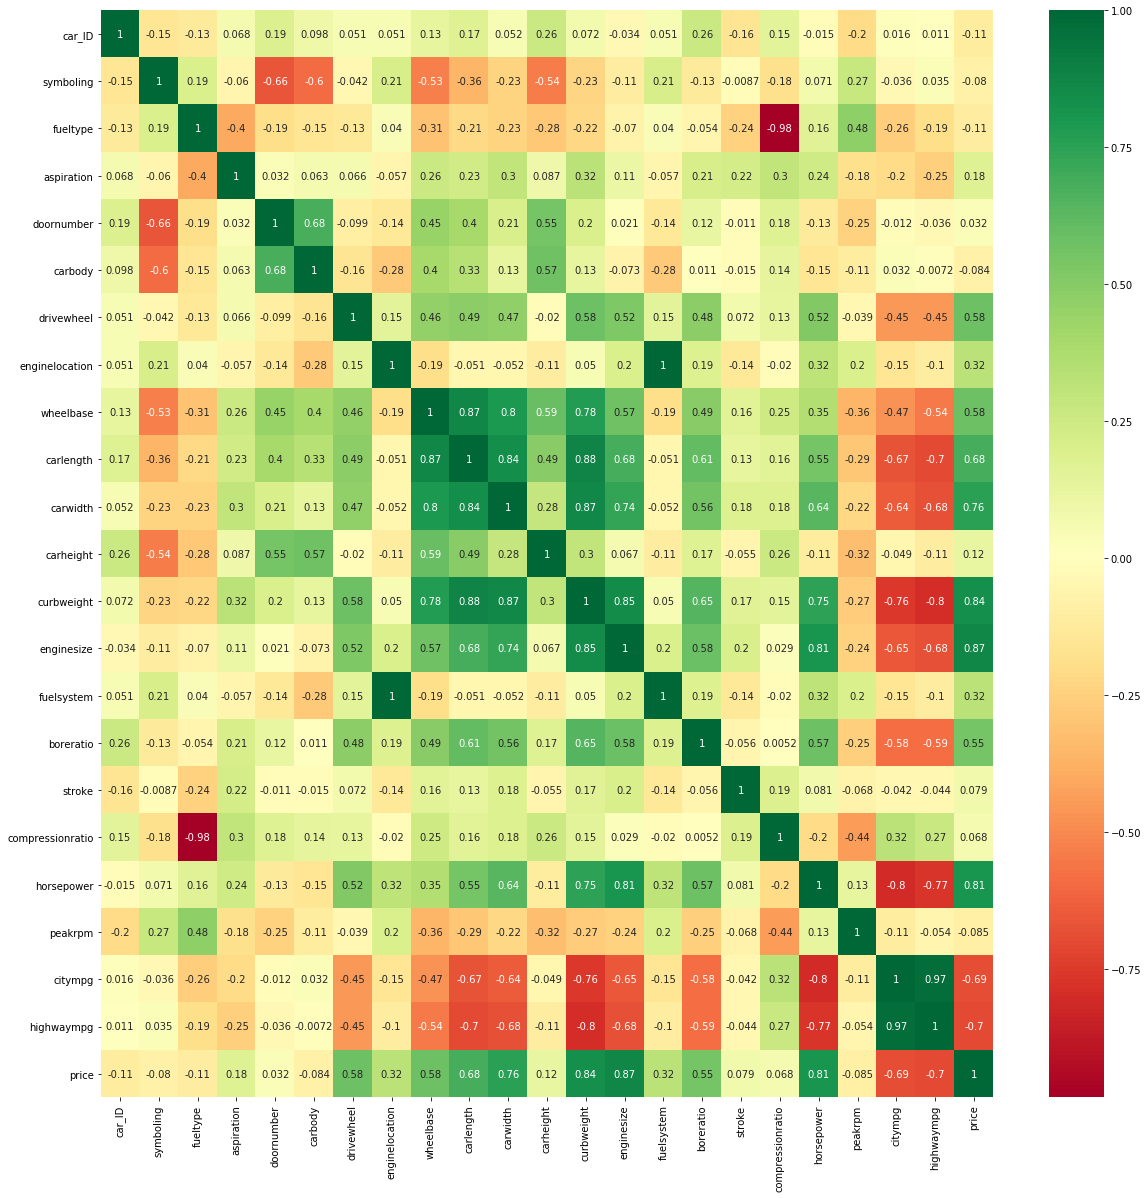

In [11]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [13]:
data1

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0
...,...,...,...,...,...,...,...,...,...,...
200,114,3.78,141,2952,68.9,188.8,109.1,2,16845.0,0
201,160,3.78,141,3049,68.8,188.8,109.1,2,19045.0,0
202,134,3.58,173,3012,68.9,188.8,109.1,2,21485.0,0
203,106,3.01,145,3217,68.9,188.8,109.1,2,22470.0,0


### Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
X = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

In [16]:
print ("X_train:\n\n", X_train, "\n\n\n")
print ("X_test:\n\n", X_test, "\n\n\n")
print ("y_train:\n\n", y_train, "\n\n\n")
print ("y_test:\n\n", y_test)

X_train:

      horsepower  boreratio  enginesize  curbweight  carwidth  carlength  \
100          97       3.33         120        2302      65.2      173.4   
144          82       3.62         108        2385      65.4      172.0   
6           110       3.19         136        2844      71.4      192.7   
185          85       3.19         109        2212      65.5      171.7   
129         288       3.94         203        3366      72.3      175.7   
..          ...        ...         ...         ...       ...        ...   
86           88       3.35         122        2405      65.4      172.4   
151          62       3.05          92        2040      63.6      158.7   
13          121       3.31         164        2765      64.8      176.8   
11          101       3.50         108        2395      64.8      176.8   
156          70       3.19          98        2081      64.4      166.3   

     wheelbase  drivewheel  enginelocation  
100       97.2           1               0 

In [17]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(143, 9) (143, 1)
(62, 9) (62, 1)


In [18]:
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")
print (X_train.dtype, X_test.dtype)

float32 float32


In [19]:
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train/= std
X_test-= mean
X_test/= std
print(mean)

[1.0425175e+02 3.3346155e+00 1.2806294e+02 2.5344055e+03 6.5802094e+01
 1.7338040e+02 9.8397209e+01 1.2937063e+00 2.0979021e-02]


In [20]:
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std
print(std)

[4.2623325e+01 2.7123070e-01 4.4423771e+01 5.1519965e+02 2.0926938e+00
 1.2552135e+01 5.8667722e+00 5.6509382e-01 1.4331400e-01]


In [21]:
val_x=X_train[:50]
partial_x_train=X_train[50:]
val_y=y_train[:50]
partial_y_train=y_train[50:]

In [22]:
partial_x_train

array([[-5.22055626e-01,  1.05218327e+00, -4.51626271e-01,
        -4.74389911e-01, -1.92140862e-01,  9.52813122e-03,
        -2.38156363e-01, -5.19747853e-01, -1.46384999e-01],
       [ 9.56008315e-01,  9.78445411e-01,  6.28876328e-01,
         5.36868513e-01,  2.37927571e-01, -1.43724279e-02,
        -4.25652742e-01, -5.19747853e-01, -1.46384999e-01],
       [-9.91282284e-01, -1.04934847e+00, -8.11793804e-01,
        -1.00816357e+00, -1.05227768e+00, -1.16955435e+00,
        -4.59743828e-01, -5.19747853e-01, -1.46384999e-01],
       [ 1.12023759e+00,  3.51673305e-01,  1.19163811e+00,
         1.02017629e+00,  3.33496720e-01,  8.93840313e-01,
         3.41378927e-01, -5.19747853e-01, -1.46384999e-01],
       [ 1.19062161e+00,  4.62280154e-01,  2.38469315e+00,
         2.23329830e+00,  2.24490857e+00,  5.51268876e-01,
        -3.06337237e-01,  1.24986982e+00, -1.46384999e-01],
       [ 1.81784332e-01, -3.48837584e-01, -6.76730990e-01,
        -4.54979956e-01, -8.61135781e-01, -3.728771

In [23]:
partial_y_train

,price
146,-0.685858
29,-0.044030
152,-0.799616
103,0.018391
72,2.533547
...,...
86,-0.601152
151,-0.817117
13,0.905819
11,0.418118


### Model

In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [25]:
import tensorflow as tf
from keras import models,layers,optimizers,losses

In [26]:
model = models.Sequential()
model.add(layers.Dense(10, activation= "relu",input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation= "relu"))
model.add(layers.Dense(6, activation= "relu"))
model.add(layers.Dense(1))
#Compile:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


#### Training Model:

In [41]:
history = model.fit(partial_x_train, partial_y_train, epochs=45, batch_size=1, verbose=1,validation_data=(val_x,val_y))

Epoch 1/45
93/93 [==============================] - 0s 3ms/step - loss: 0.1617 - mae: 0.2270 - val_loss: 0.0944 - val_mae: 0.2259
Epoch 2/45
93/93 [==============================] - 0s 3ms/step - loss: 0.1515 - mae: 0.2046 - val_loss: 0.1444 - val_mae: 0.2626
Epoch 3/45
93/93 [==============================] - 0s 4ms/step - loss: 0.1331 - mae: 0.2078 - val_loss: 0.1580 - val_mae: 0.2776
Epoch 4/45
93/93 [==============================] - 0s 3ms/step - loss: 0.1071 - mae: 0.2056 - val_loss: 0.1303 - val_mae: 0.2741
Epoch 5/45
93/93 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.2066 - val_loss: 0.0986 - val_mae: 0.2368
Epoch 6/45
93/93 [==============================] - 0s 4ms/step - loss: 0.1212 - mae: 0.1915 - val_loss: 0.0830 - val_mae: 0.2062
Epoch 7/45
93/93 [==============================] - 0s 3ms/step - loss: 0.1292 - mae: 0.2122 - val_loss: 0.1084 - val_mae: 0.2561
Epoch 8/45
93/93 [==============================] - 0s 3ms/step - loss: 0.0769 - mae: 0.16

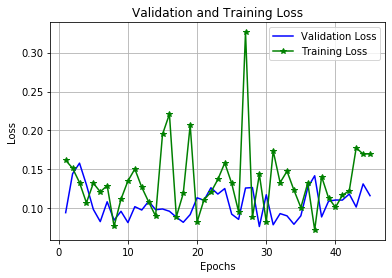

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss , label='Validation Loss',color="blue" )
plt.plot(epochs, loss,label='Training Loss', color= "green", marker= "*")
plt.title('Validation and Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [43]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0944 - mae: 0.2307


[0.0944075658917427, 0.2307482361793518]

In [44]:
result=model.predict(X_test)
result[2]

array([1.3244609], dtype=float32)

In [45]:
result_1=model.predict(X_test)
result_1[5]

array([-0.5325288], dtype=float32)

In [46]:
result_2=model.predict(X_test)
result_2[25]

array([0.64660656], dtype=float32)

### Prediction
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

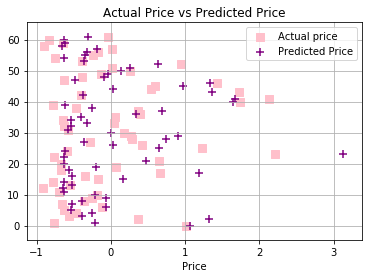

In [47]:
a = result
b = range(62)
c = y_test
plt.scatter(c, b, label= "Actual price", color= "pink", marker= ",", s=80)
plt.scatter(a, b, label= "Predicted Price", color= "purple", marker= "+", s=80)
plt.xlabel('Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.grid()
plt.show()

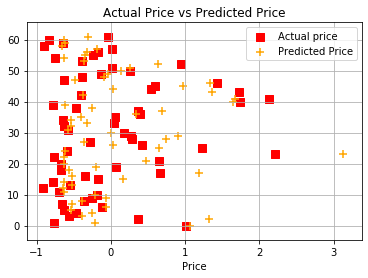

In [48]:
a = result_1
b = range(62)
c = y_test
plt.scatter(c, b, label= "Actual price", color= "red", marker= ",", s=80)
plt.scatter(a, b, label= "Predicted Price", color= "orange", marker= "+", s=80)
plt.xlabel('Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.grid()
plt.show()

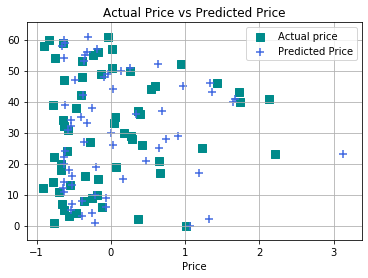

In [49]:
a = result_2
b = range(62)
c = y_test
plt.scatter(c, b, label= "Actual price", color= "darkcyan", marker= ",", s=80)
plt.scatter(a, b, label= "Predicted Price", color= "royalblue", marker= "+", s=80)
plt.xlabel('Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.grid()
plt.show()